In [1]:
class Student(object):
    def __init__(self, name, score):
        self.namm = name
        self.score = score

    def print_score(self):
        print('%s: %s' % (self.namm, self.score))
    
    def shoutout(self):
        print("Oh NO!!!")
Jade = Student('Jader', 59)
Jade.print_score()
Jade.shoutout()

Jader: 59
Oh NO!!!


In [20]:
a = [2,0.1,0.2,0.3];
b = [4,0.5,0.3,0.2];
c = np.array([a,b])
np.mean(c[::,1::],axis = 0)
np.sum(c,1)

array([2.6, 5. ])

In [39]:
import numpy as np

class Local_market(object): 
    def __init__(self, n, mkt, csp, p_t, itl, sts, wts, tps):
        self.n = np.array(n, dtype=float)  # 各职业人数
        self.consumption = np.array(csp, dtype=float)  # 消费矩阵
        self.product_time = np.array(p_t, dtype=float)  # 生产时间矩阵
        self.intolerance = np.array(itl, dtype=float)  # 商品缺乏耐受度
        self.markets = mkt  # 历史市场价格
        self.status = [np.array(st, dtype=float) for st in sts]  # 库存状态
        self.worktimes = [np.array(wt, dtype=float) for wt in wts]  # 工作时间
        self.base_prices = np.array(tps, dtype=float)  # 商品基准价格
        self.balances = np.zeros(len(n))  # 各职业的余额
    
    def evolution(self, k):
        if len(self.markets) == 0:
            self.markets.append(np.mean(self.product_time, axis=0))
        
        # 计算每日工作时间
        self.worktimes.append(np.exp(-self.balances / 1000).reshape(-1, 1) * -self.status[-1] * self.intolerance)
        
        # 计算每日生产量
        production = self.worktimes[-1] / self.product_time
        
        # 计算总市场供给量
        total_supply = np.sum(self.n.reshape(-1, 1) * production, axis=0)
        
        # 计算利润率
        profit_rates = self.markets[-1] / self.product_time
        
        # 每个职业选择利润最高的商品生产
        best_product = np.argmax(profit_rates, axis=1)
        production_choice = np.zeros_like(production)
        for i, p in enumerate(best_product):
            production_choice[i, p] = production[i, p]
        
        # 计算每日市场价格变化率（按各商品独立计算，受库存影响）
        total_demand = np.sum(self.n.reshape(-1, 1) * self.consumption, axis=0)  # 修正消耗量
        inventory_factor = np.exp(-self.status[-1].sum(axis=0) / (total_demand + 1e-5))  # 库存越多变化越慢
        price_change_rate = ((total_demand / (total_supply + 1e-5)) - 1) * 0.1 * inventory_factor
        new_market_prices = self.markets[-1] * (1 + price_change_rate)
        self.markets.append(np.round(new_market_prices, 2))
        
        # 修正后的生产量应该根据职业人数修正加入库存
        total_production = self.n.reshape(-1, 1) * production_choice  # 每个职业的生产量 * 职业人数
        total_consumption = self.n.reshape(-1, 1) * self.consumption  # 每个职业的消耗量 * 职业人数
        
        # 更新库存状态：新库存 = 旧库存 + 生产量 - 消耗量
        new_status = self.status[-1] + total_production - total_consumption
        self.status.append(np.round(new_status, 2))


In [42]:
import numpy as np

class Market1(object): 
    def __init__(self, n, csp, p_t, sts, tps):
        """
        简化的市场模型

        参数：
        - n: 各职业人数
        - csp: 消费矩阵（职业人数 × 商品种类）
        - p_t: 生产时间矩阵（职业人数 × 商品种类）
        - sts: 初始市场库存状态（商品种类）
        - tps: 商品基准价格
        """
        self.n = np.array(n, dtype=float)  # 各职业人数
        self.consumption = np.array(csp, dtype=float)  # 消费矩阵
        self.product_time = np.array(p_t, dtype=float)  # 生产时间矩阵
        self.markets = np.array(tps, dtype=float)  # 商品基准价格
        self.status = np.array(sts, dtype=float)  # 市场库存状态
    
    def evolution(self):
        """
        每次演化时更新市场价格和库存。
        """
        # 计算总需求和总供给
        total_demand = np.sum(self.n.reshape(-1, 1) * self.consumption, axis=0)
        total_supply = np.sum(self.n.reshape(-1, 1) * (1 / self.product_time), axis=0)

        # 供大于求，则价格上涨5%，供不应求则价格下降5%
        price_change_rate = np.where(total_supply > total_demand, 0.05, -0.05)
        self.markets = self.markets * (1 + price_change_rate)
        
        # 更新库存状态：库存变化 = 生产 - 消耗
        new_status = self.status + total_supply - total_demand
        self.status = np.round(new_status, 2)

In [ ]:
[]

In [67]:
import numpy as np
import matplotlib.pyplot as plt
# 创建SimpleMarket对象
class SimpleMarket(object): 
    def __init__(self, n, csp, p_t, sts):
        self.n = np.array(n, dtype=float)  # 各职业人数
        self.consumption = np.array(csp, dtype=float)  # 消费矩阵
        self.product_time = np.array(p_t, dtype=float)  # 生产时间矩阵
        self.status = np.array(sts, dtype=float)  # 市场库存状态
        
        # 价格通过单位时间的生产商品量来决定
        self.markets = np.mean(self.product_time, axis=0)

    def evolution(self):
        """
        每次演化时更新市场价格和库存。
        """
        # 计算总需求和总供给
        total_demand = np.sum(self.n.reshape(-1, 1) * self.consumption, axis=0)
        total_supply = np.sum(self.n.reshape(-1, 1) * (1 / self.product_time * lazy), axis=0)
        print(total_demand,total_supply)

        # 供大于求，则价格下降5%，供不应求则价格上升5%
        price_change_rate = np.where(total_supply < total_demand, 0.010, -0.11)
#         print(price_change_rate)
        self.markets = self.markets * (1 + price_change_rate)
        
        # 更新库存状态：库存变化 = 生产 - 消耗
        new_status = self.status + total_supply - total_demand
        self.status = np.round(new_status, 2)
        

In [54]:
n = np.array([10, 8, 3])  # 各职业人数
csp = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])  # 消费矩阵

# 进行矩阵乘法
n*csp

array([[10,  8,  3],
       [10,  8,  3],
       [10,  8,  3]])

In [82]:
a = np.zeros(4)
a[1]+=1
a

array([0., 1., 0., 0.])

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# 创建SimpleMarket对象
class SimpleMarket(object): 
    def __init__(self, n, csp, p_t, sts):
        self.n = np.array(n, dtype=float)  # 各职业人数
        self.consumption = np.array(csp, dtype=float)  # 消费矩阵
        self.product_time = np.array(p_t, dtype=float)  # 生产时间矩阵
        self.status = np.array(sts, dtype=float)  # 市场库存状态
        
        # 价格通过单位时间的生产商品量来决定
        self.markets = np.mean(self.product_time, axis=0)
        
        # 各职业存款状态（时间盈余），初始为0
        self.balances = np.zeros(len(n))

    def evolution(self):
        """
        每次演化时更新市场价格和库存。
        """
        # 计算每个职业的优势产品（即生产时间最短的商品）
        best_products = np.argmin(self.product_time, axis=1)
        
        # 每个职业生产其最有效的商品，并且基于其存款进行修正（lazy）
        choice = np.zeros_like(self.product_time)
        for i, row in enumerate(self.product_time):
            min_index = np.argmin(row)
            choice[i, min_index] = 1
        lazy = np.exp(-self.balances /10 / self.n)  # lazy因子，基于存款状态
#         print(choice,lazy)
        production = choice / self.product_time * lazy
#         print(production)

        # 计算总需求和总供给
        total_demand = np.sum(self.n.reshape(-1, 1) * self.consumption, axis=0)
        total_supply = np.sum(self.n.reshape(-1, 1) * production, axis=0)
#         print(total_demand,total_supply)

        # 供大于求，则价格下降5%，供不应求则价格上升5%
#         price_change_rate = np.where(total_supply < total_demand, 0.010, -0.11)
        self.markets = self.markets * np.exp(total_supply / total_demand - 1)
        
        # 更新库存状态：库存变化 = 生产 - 消耗
        new_status = self.status + total_supply - total_demand
        self.status = np.round(new_status, 2)
        
        # 计算每个职业的消耗支出并更新存款
        expenditure = np.sum(self.consumption * self.markets, axis=1)  # 每个职业的消耗支出（消耗量 * 商品价格）
#         print(self.consumption,self.markets,expenditure)
        earnings = np.sum(production * self.markets, axis=1)  # 每个职业通过生产和出售最有效的商品获得的盈余
#         print(production,self.markets,earnings)
        balance_change = earnings - expenditure  # 盈余 - 消耗支出
#         print(balance_change)
        self.balances += balance_change  # 更新存款状态

In [144]:
# 示例输入
n = [10, 8, 3]  # 各职业人数
csp = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]  # 每个职业的消费矩阵（消耗1个商品）
p_t = [[0.2, 0.5, 0.7], [0.4, 0.2, 0.5], [0.3, 0.7, 0.1]]  # 生产时间矩阵
sts = [10, 10, 10]  # 初始库存状态

# 创建市场对象
market = SimpleMarket(n, csp, p_t, sts)

# 记录市场价格、库存和各职业存款的变化
prices = [market.markets.copy()]
inventories = [market.status.copy()]
balances = [market.balances.copy()]

# 演化10步
for _ in range(20):
    market.evolution()
    prices.append(market.markets.copy())
    inventories.append(market.status.copy())
    balances.append(market.balances.copy())

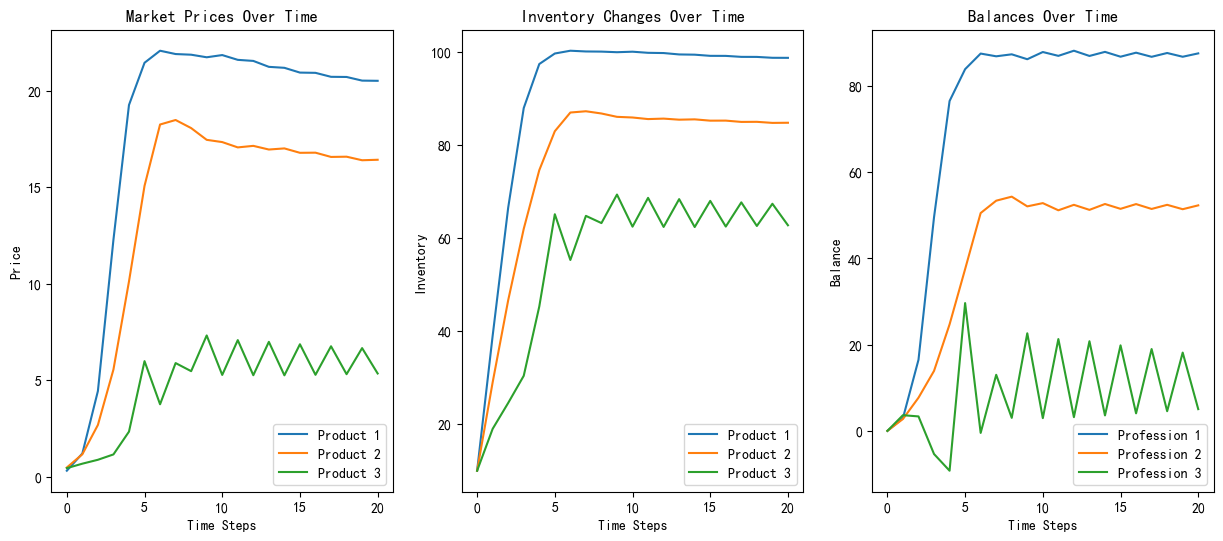

In [145]:

# 转换为numpy数组
prices = np.array(prices)
inventories = np.array(inventories)
balances = np.array(balances)

# 绘制图表
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# 市场价格变化图
ax[0].plot(prices)
ax[0].set_title("Market Prices Over Time")
ax[0].set_xlabel("Time Steps")
ax[0].set_ylabel("Price")
ax[0].legend([f"Product {i+1}" for i in range(prices.shape[1])])

# 库存变化图
ax[1].plot(inventories)
ax[1].set_title("Inventory Changes Over Time")
ax[1].set_xlabel("Time Steps")
ax[1].set_ylabel("Inventory")
ax[1].legend([f"Product {i+1}" for i in range(inventories.shape[1])])

# 各职业存款变化图
ax[2].plot(balances)
ax[2].set_title("Balances Over Time")
ax[2].set_xlabel("Time Steps")
ax[2].set_ylabel("Balance")
ax[2].legend([f"Profession {i+1}" for i in range(balances.shape[1])])

plt.show()
